## 

In [1825]:
import holidays
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_log_error
from scipy.stats import skew
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import scipy.stats as stats
import statsmodels.api as sm

In [1826]:
df_2017 = pd.read_csv(r"C:\Users\wangj\Desktop\Bike_Dataset\2017.csv")
df_2017["Time"] = pd.to_datetime(df_2017['Time'])
df_2017["Hour"] = df_2017["Time"].dt.hour
df_2017["Date"] = pd.to_datetime(df_2017["Date"])
df_2017["Month"] = df_2017["Date"].dt.month
df_2017 = df_2017.drop_duplicates(subset = ["Date","Hour"], keep = "last")
df_2018 = pd.read_csv(r"C:\Users\wangj\Desktop\Bike_Dataset\2018.csv")
df_2018["Time"] = pd.to_datetime(df_2018['Time'])
df_2018["Hour"] = df_2018["Time"].dt.hour
df_2018["Date"] = pd.to_datetime(df_2018["Date"])
df_2018["Month"] = df_2018["Date"].dt.month
df_2018 = df_2018.drop_duplicates(subset = ["Date","Hour"], keep = "last")
df_2019 = pd.read_csv(r"C:\Users\wangj\Desktop\Bike_Dataset\2019.csv")
df_2019["Time"] = pd.to_datetime(df_2019['Time'])
df_2019["Hour"] = df_2019["Time"].dt.hour
df_2019["Date"] = pd.to_datetime(df_2019["Date"])
df_2019["Month"] = df_2019["Date"].dt.month
df_2019 = df_2019.drop_duplicates(subset = ["Date","Hour"], keep = "last")
df_2020 = pd.read_csv(r"C:\Users\wangj\Desktop\Bike_Dataset\2020.csv")
df_2020["Time"] = pd.to_datetime(df_2020['Time'])
df_2020["Hour"] = df_2020["Time"].dt.hour
df_2020["Date"] = pd.to_datetime(df_2020["Date"])
df_2020["Month"] = df_2020["Date"].dt.month
df_2020 = df_2020.drop_duplicates(subset = ["Date","Hour"], keep = "last")
df_2021 = pd.read_csv(r"C:\Users\wangj\Desktop\Bike_Dataset\2021.csv")
df_2021["Time"] = pd.to_datetime(df_2021['Time'])
df_2021["Hour"] = df_2021["Time"].dt.hour
df_2021["Date"] = pd.to_datetime(df_2021["Date"])
df_2021["Month"] = df_2021["Date"].dt.month
df_2021 = df_2021.drop_duplicates(subset = ["Date","Hour"], keep = "last")
df_list = [df_2017,df_2018,df_2019,df_2020, df_2021]
combined_weather = pd.concat(df_list).drop("Time", axis = 1)
combined_weather["Weekday"] = combined_weather["Date"].dt.weekday
us_holidays = holidays.UnitedStates()
combined_weather["Holiday"] = combined_weather["Date"].apply(lambda x: x in us_holidays).astype(int)
combined_weather["Year"] = combined_weather["Date"].dt.year

In [1827]:
combined_weather

,Temperature,Dew_Point,Humidity,Wind,Wind_Speed,Wind_Gust,Pressure,Precipitation,Condition,Date,Hour,Month,Weekday,Holiday,Year
0,46,22,39,SW,9,0,29.97,0.0,Mostly Cloudy,2017-01-01,0,1,6,1,2017
1,44,22,42,SSW,9,0,29.98,0.0,Partly Cloudy,2017-01-01,1,1,6,1,2017
2,43,23,45,SSW,13,0,30.00,0.0,Partly Cloudy,2017-01-01,2,1,6,1,2017
3,41,23,49,SW,5,0,30.02,0.0,Partly Cloudy,2017-01-01,3,1,6,1,2017
4,40,23,51,SSW,5,0,30.04,0.0,Partly Cloudy,2017-01-01,4,1,6,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10636,53,50,89,ENE,3,0,29.90,0.0,Light Rain,2021-12-31,19,12,4,1,2021
10637,54,50,86,S,12,0,29.87,0.0,Light Rain,2021-12-31,20,12,4,1,2021
10638,55,52,89,S,8,0,29.89,0.0,Cloudy,2021-12-31,21,12,4,1,2021
10639,55,52,89,S,8,0,29.88,0.0,Cloudy,2021-12-31,22,12,4,1,2021


In [1828]:
df_demand = pd.read_csv(r"C:\Users\wangj\Desktop\Bike_Dataset\Demand.csv")
df_demand["Date"] = pd.to_datetime(df_demand["Date"])
bike_demand = pd.merge(combined_weather, df_demand, how = "right", on = ["Date", "Hour"])
bike_demand.isna().sum()

Temperature       99
Dew_Point         99
Humidity          99
Wind             143
Wind_Speed        99
Wind_Gust         99
Pressure          99
Precipitation     99
Condition        102
Date               0
Hour               0
Month             99
Weekday           99
Holiday           99
Year              99
Demand             0
dtype: int64

Since missing values are less than 5% of the data, we choose to discard them.

In [1829]:
bike_demand = pd.merge(combined_weather, df_demand, how = "inner", on = ["Date", "Hour"])
bike_demand["Workingday"] = (bike_demand["Weekday"]!=0)&(bike_demand["Weekday"]!=6)&(bike_demand["Holiday"]!=1)
bike_demand["Workingday"] = bike_demand["Workingday"].astype(int)
bike_demand = bike_demand.dropna(axis = 0, how = "any")
print(bike_demand.isna().sum())
bike_demand["Condition"]=bike_demand["Condition"].str.replace("-","_").str.replace("/","or").str.replace(" ","_")

Temperature      0
Dew_Point        0
Humidity         0
Wind             0
Wind_Speed       0
Wind_Gust        0
Pressure         0
Precipitation    0
Condition        0
Date             0
Hour             0
Month            0
Weekday          0
Holiday          0
Year             0
Demand           0
Workingday       0
dtype: int64


In [1830]:
bikes = bike_demand.copy()
bikes.head(10)

,Temperature,Dew_Point,Humidity,Wind,Wind_Speed,Wind_Gust,Pressure,Precipitation,Condition,Date,Hour,Month,Weekday,Holiday,Year,Demand,Workingday
0,46,22,39,SW,9,0,29.97,0.0,Mostly_Cloudy,2017-01-01,0,1,6,1,2017,77,0
1,44,22,42,SSW,9,0,29.98,0.0,Partly_Cloudy,2017-01-01,1,1,6,1,2017,80,0
2,43,23,45,SSW,13,0,30.00,0.0,Partly_Cloudy,2017-01-01,2,1,6,1,2017,62,0
3,41,23,49,SW,5,0,30.02,0.0,Partly_Cloudy,2017-01-01,3,1,6,1,2017,18,0
4,40,23,51,SSW,5,0,30.04,0.0,Partly_Cloudy,2017-01-01,4,1,6,1,2017,5,0
5,40,27,60,NE,3,0,30.08,0.0,Mostly_Cloudy,2017-01-01,5,1,6,1,2017,5,0
6,39,27,62,CALM,0,0,30.11,0.0,Mostly_Cloudy,2017-01-01,6,1,6,1,2017,8,0
7,40,28,63,SW,3,0,30.13,0.0,Mostly_Cloudy,2017-01-01,7,1,6,1,2017,24,0
8,44,28,53,CALM,0,0,30.16,0.0,Mostly_Cloudy,2017-01-01,8,1,6,1,2017,53,0
9,45,28,52,CALM,0,0,30.19,0.0,Mostly_Cloudy,2017-01-01,9,1,6,1,2017,108,0


## Exploratory Data Analysis

In [1831]:
bikes = bikes.drop_duplicates()
bikes.dtypes

Temperature               int64
Dew_Point                 int64
Humidity                  int64
Wind                     object
Wind_Speed                int64
Wind_Gust                 int64
Pressure                float64
Precipitation           float64
Condition                object
Date             datetime64[ns]
Hour                      int64
Month                     int64
Weekday                   int64
Holiday                   int32
Year                      int64
Demand                    int64
Workingday                int32
dtype: object

In [1832]:
bikes["Wind"].value_counts(dropna=False)

S       8536
NNW     3886
NW      3361
CALM    3327
SSW     3323
N       3226
NE      2321
NNE     2091
WNW     1975
SSE     1889
ENE     1726
SW      1528
W       1501
E       1415
SE      1010
ESE      955
WSW      898
VAR      620
Name: Wind, dtype: int64

In [1833]:
bikes["Condition"].value_counts(dropna=False)

Cloudy                     12102
Mostly_Cloudy              11193
Fair                        9295
Partly_Cloudy               5826
Light_Rain                  2352
Light_Drizzle                403
Rain                         308
Mostly_Cloudy_or_Windy       277
Fair_or_Windy                232
Cloudy_or_Windy              213
Light_Snow                   205
Partly_Cloudy_or_Windy       178
Fog                          154
Heavy_Rain                   111
Light_Rain_with_Thunder      104
Thunder_in_the_Vicinity       98
Thunder                       98
Wintry_Mix                    97
Light_Rain_or_Windy           70
T_Storm                       54
Haze                          51
Heavy_T_Storm                 46
Shallow_Fog                   18
Mist                          12
Rain_or_Windy                 11
Snow                           9
Wintry_Mix_or_Windy            8
Light_Snow_or_Windy            8
Light_Freezing_Rain            8
Light_Snow_and_Sleet           7
Heavy_Rain

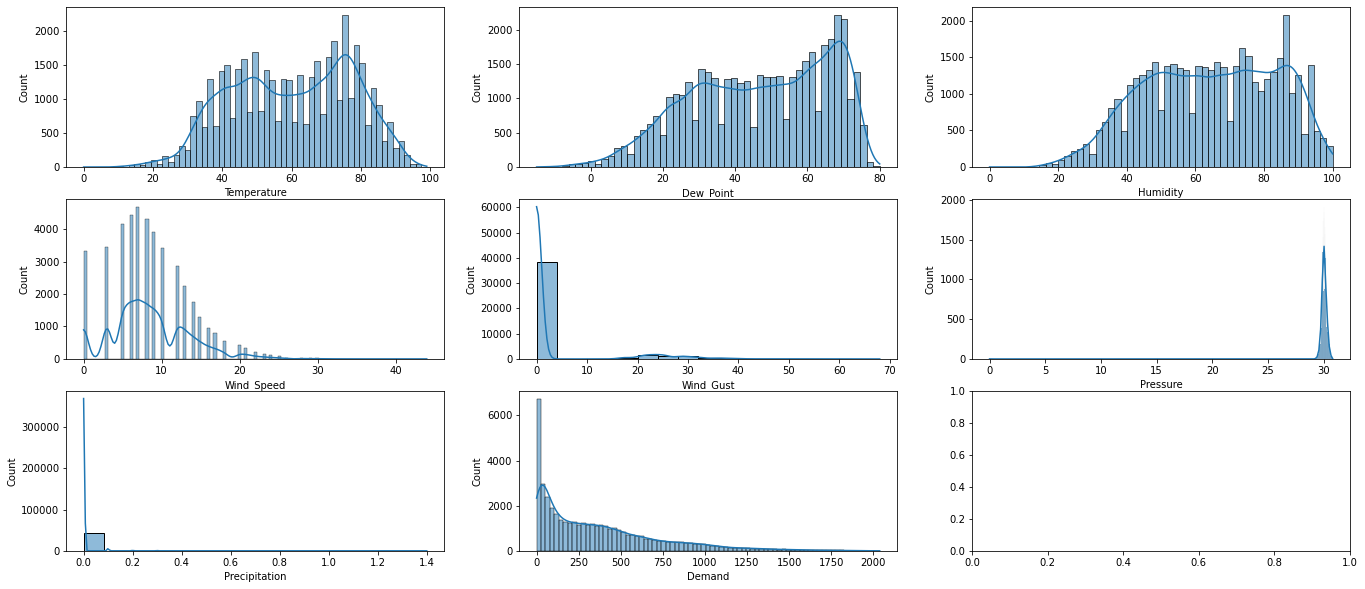

In [1834]:
#Data Visualization of numerical varaible
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(23,10))
sns.histplot(bikes["Temperature"], ax = axs[0,0], kde = True)
sns.histplot(bikes["Dew_Point"], ax = axs[0,1], kde = True)
sns.histplot(bikes["Humidity"], ax = axs[0,2], kde = True)
sns.histplot(bikes["Wind_Speed"], ax = axs[1,0], kde = True)
sns.histplot(bikes["Wind_Gust"], ax = axs[1,1], kde = True)
sns.histplot(bikes["Pressure"], ax = axs[1,2], kde = True)
sns.histplot(bikes["Precipitation"], ax = axs[2,0], kde = True)
sns.histplot(bikes["Demand"], ax = axs[2,1], kde = True)
plt.show()

Demand has log normal distribution, so we will apply a log transformation to to decrease it's skewness. 

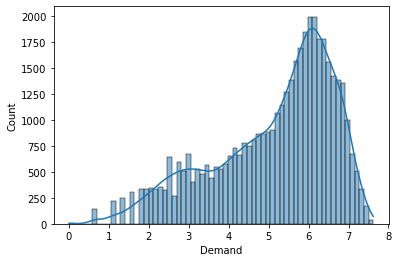

Skewness before transformation: 1.2742614847902538
Skewness before transformation: -0.7898860695433128


In [1835]:
sns.histplot(np.log(bikes["Demand"]+1), kde = True)
plt.show()
print("Skewness before transformation:",skew(bikes["Demand"]))
print("Skewness before transformation:",skew(np.log(bikes["Demand"]+1)))

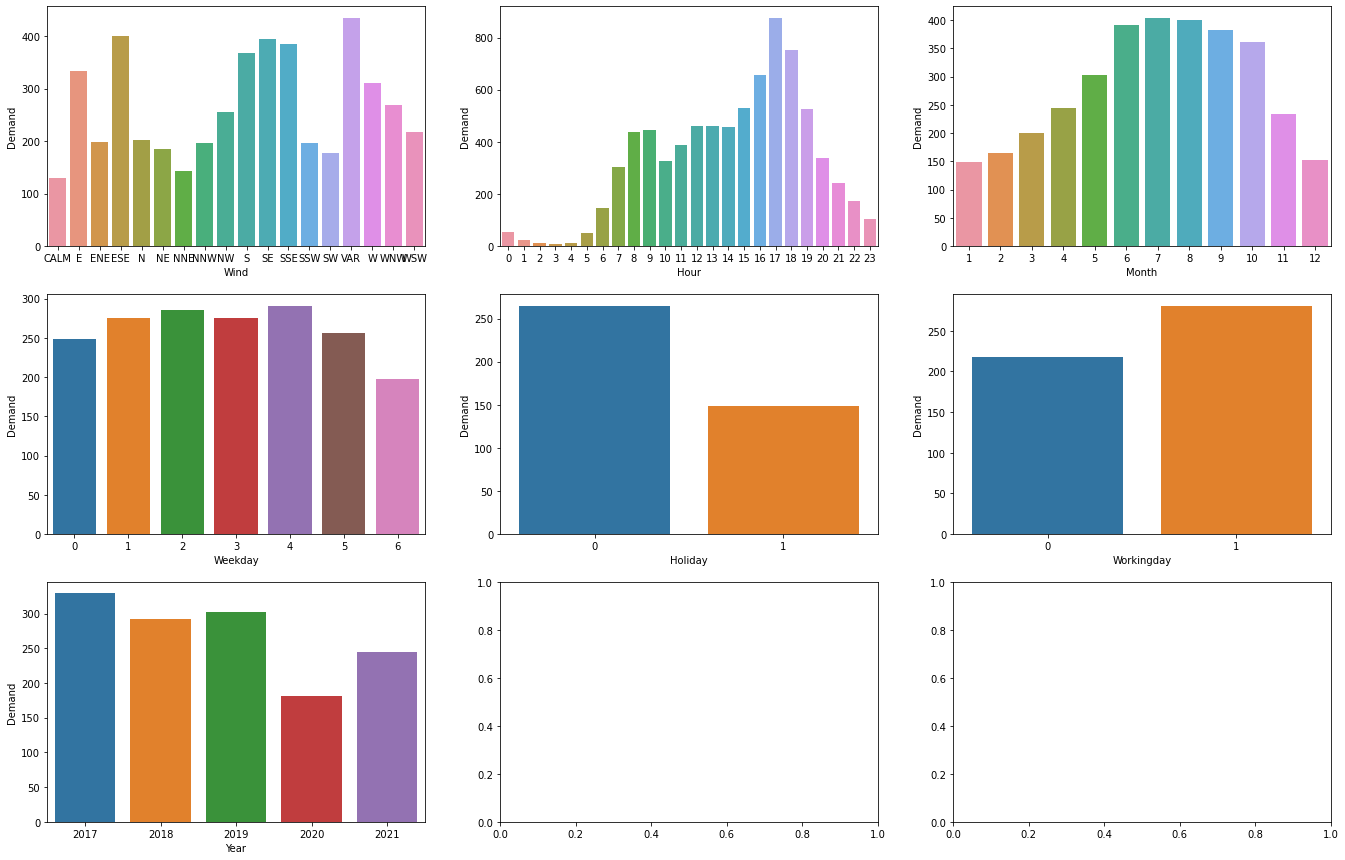

In [1840]:
# Data Visualization of categorical variable
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(23,15))
total_demand_by_wind = bikes.groupby("Wind")["Demand"].median().reset_index()
sns.barplot(data = total_demand_by_wind, x = 'Wind', y = 'Demand', ax = axs[0,0])
total_demand_by_hour = bikes.groupby("Hour")["Demand"].median().reset_index()
sns.barplot(data = total_demand_by_hour, x = 'Hour', y = 'Demand', ax = axs[0,1])
total_demand_by_month = bikes.groupby("Month")["Demand"].median().reset_index()
sns.barplot(data = total_demand_by_month, x = 'Month', y = 'Demand', ax = axs[0,2])
total_demand_by_weekday = bikes.groupby("Weekday")["Demand"].median().reset_index()
sns.barplot(data = total_demand_by_weekday, x = 'Weekday', y = 'Demand', ax = axs[1,0])
total_demand_by_holiday = bikes.groupby("Holiday")["Demand"].median().reset_index()
sns.barplot(data = total_demand_by_holiday, x = 'Holiday', y = 'Demand', ax = axs[1,1])
total_demand_by_workingday = bikes.groupby("Workingday")["Demand"].median().reset_index()
sns.barplot(data = total_demand_by_workingday, x = 'Workingday', y = 'Demand', ax = axs[1,2])
total_demand_by_year = bikes.groupby("Year")["Demand"].median().reset_index()
ax = sns.barplot(data = total_demand_by_year, x = 'Year', y = 'Demand', ax = axs[2,0])
plt.show()


In [1841]:
bikes.describe()

,Temperature,Dew_Point,Humidity,Wind_Speed,Wind_Gust,Pressure,Precipitation,Hour,Month,Weekday,Holiday,Year,Demand,Workingday
count,43588.000000,43588.000000,43588.000000,43588.000000,43588.000000,43588.000000,43588.000000,43588.000000,43588.000000,43588.000000,43588.000000,43588.000000,43588.000000,43588.000000
mean,60.073254,46.843879,64.375814,8.553088,3.038956,30.042258,0.003294,11.522323,6.526590,3.000229,0.032371,2019.000849,358.009613,0.700491
std,17.317239,18.854616,18.888778,4.977053,8.634998,0.330584,0.032226,6.915773,3.448962,1.999576,0.176986,1.414238,353.104882,0.458048
min,0.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2017.000000,0.000000,0.000000
25%,46.000000,32.000000,49.000000,5.000000,0.000000,29.900000,0.000000,6.000000,4.000000,1.000000,0.000000,2018.000000,65.000000,0.000000
50%,61.000000,49.000000,65.000000,8.000000,0.000000,30.040000,0.000000,12.000000,7.000000,3.000000,0.000000,2019.000000,261.000000,1.000000
75%,75.000000,64.000000,81.000000,12.000000,0.000000,30.180000,0.000000,18.000000,10.000000,5.000000,0.000000,2020.000000,535.000000,1.000000
max,99.000000,80.000000,100.000000,44.000000,68.000000,30.810000,1.400000,23.000000,12.000000,6.000000,1.000000,2021.000000,2038.000000,1.000000


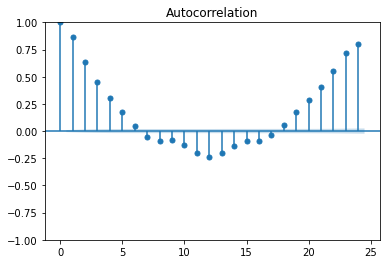

In [1842]:
from statsmodels.graphics.tsaplots import plot_acf
# Check autocorrelation
plot_acf(bikes["Demand"], lags=24)
plt.show()

In [1843]:
bikes = bikes.drop("Date",axis=1)

# Feature Engineering

In [1844]:
bikes["Demand"]= np.log(bikes["Demand"]+1)
bikes["t_1"] = bikes["Demand"].shift(+1).rename("t_1").to_frame()
bikes["t_2"]= bikes["Demand"].shift(+2).rename("t_2").to_frame()
bikes["t_3"] = bikes["Demand"].shift(+3).rename("t_3").to_frame()
bikes["t_4"] = bikes["Demand"].shift(+4).rename("t_4").to_frame()
bikes["t_5"]= bikes["Demand"].shift(+5).rename("t_5").to_frame()
bikes["t_6"] = bikes["Demand"].shift(+6).rename("t_6").to_frame()
bikes = bikes.dropna()
bikes

,Temperature,Dew_Point,Humidity,Wind,Wind_Speed,Wind_Gust,Pressure,Precipitation,Condition,Hour,...,Holiday,Year,Demand,Workingday,t_1,t_2,t_3,t_4,t_5,t_6
6,39,27,62,CALM,0,0,30.11,0.0,Mostly_Cloudy,6,...,1,2017,2.197225,0,1.791759,1.791759,2.944439,4.143135,4.394449,4.356709
7,40,28,63,SW,3,0,30.13,0.0,Mostly_Cloudy,7,...,1,2017,3.218876,0,2.197225,1.791759,1.791759,2.944439,4.143135,4.394449
8,44,28,53,CALM,0,0,30.16,0.0,Mostly_Cloudy,8,...,1,2017,3.988984,0,3.218876,2.197225,1.791759,1.791759,2.944439,4.143135
9,45,28,52,CALM,0,0,30.19,0.0,Mostly_Cloudy,9,...,1,2017,4.691348,0,3.988984,3.218876,2.197225,1.791759,1.791759,2.944439
10,49,29,46,CALM,0,0,30.20,0.0,Mostly_Cloudy,10,...,1,2017,5.129899,0,4.691348,3.988984,3.218876,2.197225,1.791759,1.791759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43703,53,50,89,ENE,3,0,29.90,0.0,Light_Rain,19,...,1,2021,5.438079,0,5.627621,5.883322,6.287859,6.483107,6.450470,6.410175
43704,54,50,86,S,12,0,29.87,0.0,Light_Rain,20,...,1,2021,4.941642,0,5.438079,5.627621,5.883322,6.287859,6.483107,6.450470
43705,55,52,89,S,8,0,29.89,0.0,Cloudy,21,...,1,2021,4.744932,0,4.941642,5.438079,5.627621,5.883322,6.287859,6.483107
43706,55,52,89,S,8,0,29.88,0.0,Cloudy,22,...,1,2021,4.844187,0,4.744932,4.941642,5.438079,5.627621,5.883322,6.287859


In [1845]:
bikes["Hour"] = bikes["Hour"].astype("category")
bikes["Month"] = bikes["Month"].astype("category")
bikes["Weekday"] = bikes["Weekday"].astype("category")
bikes["Holiday"] = bikes["Holiday"].astype("category")
bikes["Year"] = bikes["Year"].astype("category")
bikes["Workingday"] = bikes["Workingday"].astype("category")
bikes = pd.get_dummies(bikes, columns = None ,drop_first=True)
bikes

,Temperature,Dew_Point,Humidity,Wind_Speed,Wind_Gust,Pressure,Precipitation,Demand,t_1,t_2,...,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Holiday_1,Year_2018,Year_2019,Year_2020,Year_2021,Workingday_1
6,39,27,62,0,0,30.11,0.0,2.197225,1.791759,1.791759,...,0,0,0,1,1,0,0,0,0,0
7,40,28,63,3,0,30.13,0.0,3.218876,2.197225,1.791759,...,0,0,0,1,1,0,0,0,0,0
8,44,28,53,0,0,30.16,0.0,3.988984,3.218876,2.197225,...,0,0,0,1,1,0,0,0,0,0
9,45,28,52,0,0,30.19,0.0,4.691348,3.988984,3.218876,...,0,0,0,1,1,0,0,0,0,0
10,49,29,46,0,0,30.20,0.0,5.129899,4.691348,3.988984,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43703,53,50,89,3,0,29.90,0.0,5.438079,5.627621,5.883322,...,0,1,0,0,1,0,0,0,1,0
43704,54,50,86,12,0,29.87,0.0,4.941642,5.438079,5.627621,...,0,1,0,0,1,0,0,0,1,0
43705,55,52,89,8,0,29.89,0.0,4.744932,4.941642,5.438079,...,0,1,0,0,1,0,0,0,1,0
43706,55,52,89,8,0,29.88,0.0,4.844187,4.744932,4.941642,...,0,1,0,0,1,0,0,0,1,0


eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


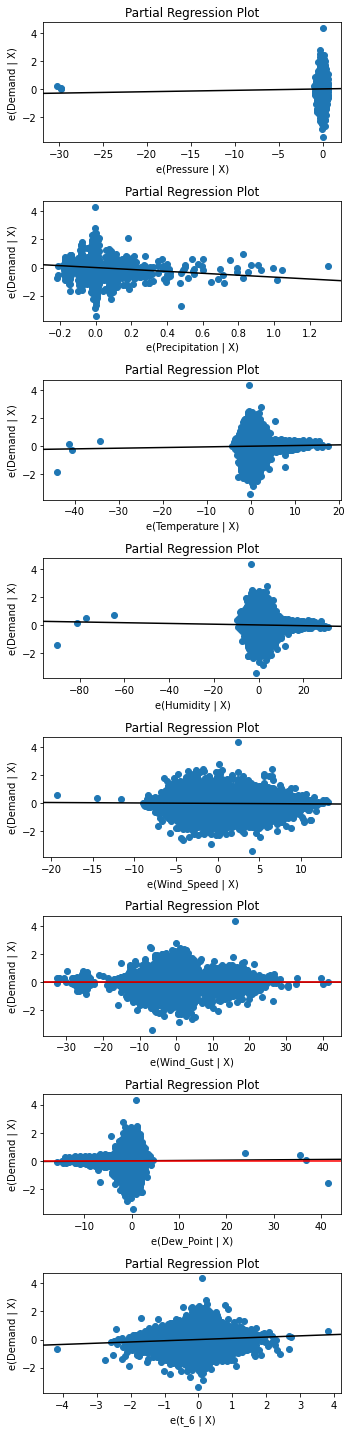

In [1846]:
from statsmodels.graphics.regressionplots import plot_partregress
fig = plt.figure(figsize=(5, 20))
plot_partregress('Demand', 'Pressure', list(bikes.drop(["Demand","Pressure"], axis = 1).columns), data=bikes, ax=fig.add_subplot(8, 1, 1), obs_labels = False)
plot_partregress('Demand', 'Precipitation', list(bikes.drop(["Demand","Precipitation"], axis = 1).columns), data=bikes, ax=fig.add_subplot(8, 1, 2), obs_labels = False)
plot_partregress('Demand', 'Temperature',list(bikes.drop(["Demand","Temperature"], axis = 1).columns), data=bikes, ax=fig.add_subplot(8, 1, 3), obs_labels = False)
plot_partregress('Demand', 'Humidity',list(bikes.drop(["Demand","Humidity"], axis = 1).columns), data=bikes, ax=fig.add_subplot(8, 1, 4), obs_labels = False)
plot_partregress('Demand', 'Wind_Speed',list(bikes.drop(["Demand","Wind_Speed"], axis = 1).columns), data=bikes, ax=fig.add_subplot(8, 1, 5), obs_labels = False)
plot_partregress('Demand', 'Wind_Gust',list(bikes.drop(["Demand","Wind_Gust"], axis = 1).columns), data=bikes, ax=fig.add_subplot(8, 1, 6), obs_labels = False)
plt.axhline(y=0, color='r', linestyle='-')
plot_partregress('Demand', 'Dew_Point',list(bikes.drop(["Demand","Dew_Point"], axis = 1).columns), data=bikes, ax=fig.add_subplot(8, 1, 7), obs_labels = False)
plt.axhline(y=0, color='r', linestyle='-')
plot_partregress('Demand', 't_6',list(bikes.drop(["Demand","t_6"], axis = 1).columns), data=bikes, ax=fig.add_subplot(8, 1, 8), obs_labels = False)
plt.tight_layout()
plt.show()

According to partial regression plots, we can easily see that Wind_Gust and Dew_Point won't contribute to the model at all. It's better to drop them from the model. The correlation graph further confirmed that we should drop them due to multicollinearity.

In [1805]:
bikes.describe()

,Temperature,Dew_Point,Humidity,Wind_Speed,Wind_Gust,Pressure,Precipitation,Demand,t_1,t_2,...,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Holiday_1,Year_2018,Year_2019,Year_2020,Year_2021,Workingday_1
count,43582.000000,43582.000000,43582.000000,43582.000000,43582.000000,43582.000000,43582.000000,43582.000000,43582.000000,43582.000000,...,43582.000000,43582.000000,43582.000000,43582.000000,43582.000000,43582.000000,43582.000000,43582.000000,43582.000000,43582.000000
mean,60.075696,46.847116,64.378115,8.553256,3.039374,30.042262,0.003295,5.142703,5.142634,5.142564,...,0.143041,0.143178,0.142765,0.142628,0.032238,0.199899,0.200335,0.199738,0.200335,0.700587
std,17.317161,18.853885,18.888891,4.977220,8.635519,0.330606,0.032229,1.497388,1.497473,1.497558,...,0.350118,0.350259,0.349837,0.349697,0.176634,0.399929,0.400256,0.399808,0.400256,0.458006
min,0.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,32.000000,49.000000,5.000000,0.000000,29.900000,0.000000,4.189655,4.189655,4.189655,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,61.000000,49.000000,65.000000,8.000000,0.000000,30.040000,0.000000,5.568345,5.568345,5.568345,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,75.000000,64.000000,81.000000,12.000000,0.000000,30.180000,0.000000,6.284134,6.284134,6.284134,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,99.000000,80.000000,100.000000,44.000000,68.000000,30.810000,1.400000,7.620215,7.620215,7.620215,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1847]:
#Removing features that have little to no variance in the model
X_num = bikes
selector = VarianceThreshold(threshold=0.01)
selector.fit_transform(X_num)
num_cols = list(X_num.columns[selector.get_support(indices=True)])
print(len(num_cols))

80


We dropped 37 variables.

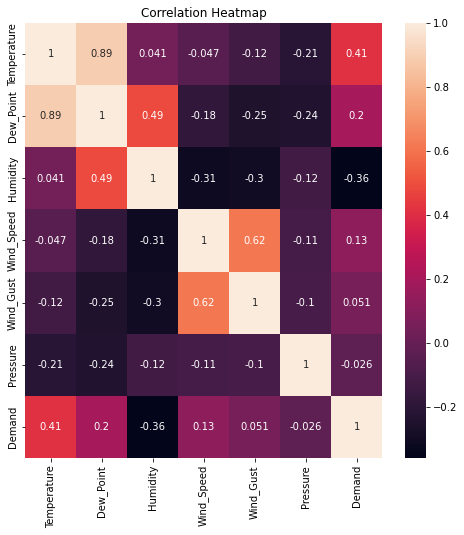

In [1848]:
correlation = bikes[["Temperature","Dew_Point","Humidity","Wind_Speed","Wind_Gust","Pressure","Demand"]].corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation,annot=True).set_title("Correlation Heatmap")
plt.show()

In [1849]:
# Dropping Features
bikes= bikes[num_cols].drop(["Dew_Point","Wind_Gust"], axis = 1)

In [1850]:
bikes

,Temperature,Humidity,Wind_Speed,Pressure,Demand,t_1,t_2,t_3,t_4,t_5,...,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Holiday_1,Year_2018,Year_2019,Year_2020,Year_2021,Workingday_1
6,39,62,0,30.11,2.197225,1.791759,1.791759,2.944439,4.143135,4.394449,...,0,0,0,1,1,0,0,0,0,0
7,40,63,3,30.13,3.218876,2.197225,1.791759,1.791759,2.944439,4.143135,...,0,0,0,1,1,0,0,0,0,0
8,44,53,0,30.16,3.988984,3.218876,2.197225,1.791759,1.791759,2.944439,...,0,0,0,1,1,0,0,0,0,0
9,45,52,0,30.19,4.691348,3.988984,3.218876,2.197225,1.791759,1.791759,...,0,0,0,1,1,0,0,0,0,0
10,49,46,0,30.20,5.129899,4.691348,3.988984,3.218876,2.197225,1.791759,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43703,53,89,3,29.90,5.438079,5.627621,5.883322,6.287859,6.483107,6.450470,...,0,1,0,0,1,0,0,0,1,0
43704,54,86,12,29.87,4.941642,5.438079,5.627621,5.883322,6.287859,6.483107,...,0,1,0,0,1,0,0,0,1,0
43705,55,89,8,29.89,4.744932,4.941642,5.438079,5.627621,5.883322,6.287859,...,0,1,0,0,1,0,0,0,1,0
43706,55,89,8,29.88,4.844187,4.744932,4.941642,5.438079,5.627621,5.883322,...,0,1,0,0,1,0,0,0,1,0


From the correlation heatmap, we can see that Temperature and Dew Point have a correlation of 0.88 and Dew Point is less associated with Demand. To avoid multicollinearity, we should drop Dew Point. Also, we can see that the correlation between Wind Gust and Demand is close to zero; At the same time, Wind Gust and Wind Speed have a correlation of 0.62. So we should drop Wind Gust.

In [1851]:
X_enc = bikes.drop("Demand",axis=1)
y = bikes["Demand"]
mutual_info_list = mutual_info_regression(X_enc, y, discrete_features = np.array(range(10,len(bikes.columns)-1,1)) ,random_state=68)
ind_indices = []
for i in range(len(mutual_info_list)):
    if mutual_info_list[i] == 0:
        ind_indices.append(i)
print(mutual_info_list)

[1.70053738e-01 1.01236735e-01 2.18827266e-02 1.42322095e-02
 9.75175432e-01 5.33526989e-01 3.54085029e-01 2.40460883e-01
 1.63354160e-01 1.06014113e-01 1.04508081e-03 4.40217812e-04
 6.72076257e-04 5.89872444e-04 3.20963644e-04 1.31838011e-03
 3.25788819e-03 0.00000000e+00 4.24511151e-03 2.75780715e-03
 1.87221510e-03 3.82001762e-03 4.64901743e-04 2.74700381e-03
 5.92742424e-04 1.66670080e-03 0.00000000e+00 1.28284854e-03
 7.28095845e-03 1.02311647e-02 4.66508572e-03 4.23841358e-02
 5.05965367e-02 7.15265022e-02 7.67365034e-02 4.60783726e-02
 2.18135967e-02 1.23289027e-02 2.15171491e-02 2.25147737e-02
 1.82043151e-02 1.49250200e-02 1.57999774e-02 1.52309531e-02
 1.48146394e-02 1.90937762e-02 2.54616631e-02 4.18698962e-02
 2.77534626e-02 1.57232239e-02 1.43002394e-02 1.75687663e-02
 2.23957967e-02 3.05041410e-02 5.34819728e-03 1.71564383e-03
 2.92185870e-03 1.37363151e-03 1.96495872e-03 3.86165821e-03
 6.99485271e-03 4.27111074e-03 3.23453454e-03 1.89257387e-03
 1.04960327e-02 5.174503

In [1853]:
features_drop = list(X_enc.iloc[:,ind_indices].columns)
bikes = bikes.drop(columns=features_drop,axis=1)
print(bikes.shape)

(43582, 76)


In [1821]:
#Feature Selection
#Method 1: Principle Component Analysis(PCA)
ct = ColumnTransformer([('scaler', StandardScaler(), ["Temperature","Humidity","Wind_Speed","Pressure","t_1","t_2","t_3","t_4","t_5","t_6"])], remainder='passthrough')
X_transformed = ct.fit_transform(bikes.drop("Demand", axis = 1))
pca = PCA(n_components=75)

# fit and transform the data
X_pca = pca.fit_transform(X_transformed)

# print the variance ratio of the selected components
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
X_pca

[3.19048570e-01 1.16777639e-01 8.59459776e-02 7.43631963e-02
 4.47580034e-02 4.04002271e-02 2.15354127e-02 1.57082748e-02
 1.40745746e-02 1.38041264e-02 1.34750848e-02 1.27992726e-02
 1.09741536e-02 9.83884782e-03 9.81611531e-03 9.80072543e-03
 9.66054170e-03 6.66478851e-03 5.91066714e-03 5.87628264e-03
 5.84567305e-03 5.81352895e-03 5.74402628e-03 5.72336988e-03
 5.68280939e-03 5.59586776e-03 5.49615322e-03 5.37349051e-03
 5.00741743e-03 4.95110793e-03 4.81347698e-03 4.36746453e-03
 4.05257289e-03 3.48805781e-03 3.30044139e-03 3.22140071e-03
 3.06304684e-03 2.96987966e-03 2.91516454e-03 2.88101635e-03
 2.87769328e-03 2.87664300e-03 2.87553055e-03 2.87332652e-03
 2.87292508e-03 2.87001899e-03 2.86881974e-03 2.86381509e-03
 2.86321230e-03 2.86062754e-03 2.85523571e-03 2.83845759e-03
 2.81552265e-03 2.79273794e-03 2.75436980e-03 2.50470664e-03
 2.44680213e-03 2.12611476e-03 1.92906489e-03 1.69405625e-03
 1.61988554e-03 1.52770901e-03 1.28223613e-03 1.24003918e-03
 1.10097424e-03 1.021632

array([[ 3.31092121e+00,  1.68090045e+00, -9.52374874e-01, ...,
        -1.93612311e-03, -5.49777893e-04,  3.85897533e-02],
       [ 3.94512985e+00,  1.21430949e+00, -8.08561545e-01, ...,
        -5.86248165e-03,  2.80440455e-03,  3.54035988e-02],
       [ 4.18920655e+00,  3.76659750e-01, -3.86138100e-01, ...,
         5.17668575e-03,  5.91814887e-03,  4.53411507e-02],
       ...,
       [-7.41154317e-01,  1.42482420e+00,  1.61767236e-01, ...,
        -2.23835912e-03,  6.43010444e-03, -3.46218444e-03],
       [-2.83727915e-01,  1.40721541e+00,  2.20641444e-01, ...,
        -1.00646627e-03,  6.04797511e-03, -4.63222977e-03],
       [ 1.53044063e-01,  1.50851420e+00,  4.88646434e-01, ...,
         4.92822668e-03,  1.04819932e-02,  2.42284752e-03]])

PCA is not very useful in this case since there is not much correlation or structure in the data that can be captured by the principal components. In this case, it might be difficult to explain a high proportion of the total variation in the data using just a small number of principal components.

In [1857]:
ct = ColumnTransformer([('scaler', StandardScaler(), ["Temperature","Humidity","Wind_Speed","Pressure","t_1","t_2","t_3","t_4","t_5","t_6"])], remainder='passthrough')
X_transformed = ct.fit_transform(bikes.drop("Demand", axis = 1))

In [1732]:
#Feature Selection
#Method 2 Recursive Feature Elimination
from sklearn.feature_selection import RFE
y = bikes["Demand"]
model = LinearRegression()
selector = RFE(model, n_features_to_select=50)
selector.fit(X_transformed, y)

print(selector.support_)
print(selector.ranking_)

[ True  True False False  True  True  True  True  True  True  True False
  True False False False False  True  True False  True False False False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False False False False False False  True
  True  True False  True  True  True False False False  True False False
  True  True  True]
[ 1  1  4 22  1  1  1  1  1  1  1  6  1 18 24 20  7  1  1  2  1 25 23 16
 17  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 26 13  8 12 14  5 15  1  1  1 19  1  1  1  9 10 11  1 21  3
  1  1  1]


In [1858]:
X = X_transformed
y = bikes["Demand"]
model = LinearRegression()
selector = RFE(model, n_features_to_select=30)
selector.fit(X, y)
X = selector.transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [1859]:
n = X.shape[0]
p = X.shape[1]
r2 = r2_score(y_test, y_pred)
ad_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print(r2)
print(ad_r2)
print(mean_squared_log_error(np.exp(y_test), np.exp(y_pred)))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.9408539634774099
0.9408132208745839
0.11986758454261276
0.362243195359418


In [1819]:
#Feature Selection
#Method 3 
from mlxtend.feature_selection import SequentialFeatureSelector
X = X_transformed
y = bikes["Demand"]
model = LinearRegression()
selector = SequentialFeatureSelector(model, forward=True, k_features=30)
selector.fit(X, y)
print(selector.k_feature_names_)
X = selector.transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

('0', '1', '4', '5', '6', '7', '9', '10', '35', '48', '58', '59', '60', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '78', '80')


In [1820]:
n = X.shape[0]
p = X.shape[1]
r2 = r2_score(y_test, y_pred)
ad_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print(r2)
print(ad_r2)
print(mean_squared_log_error(np.exp(y_test), np.exp(y_pred)))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.9370400345581454
0.9369966647396968
0.1275755524492463
0.3737400617738991


# Buiding Model

In [1822]:
#Data Splitting
X = X_pca
y = bikes["Demand"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [1823]:
#Fitting Linear Regression Model
lr = LinearRegression()
lr.fit(X_train,y_train)
y_test_pred = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
rmsle = mean_squared_log_error(np.exp(y_test), np.exp(y_test_pred))
r2 = r2_score(y_test, y_test_pred)
n = X.shape[0]
p = X.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print('R-squared:', r2)
print('Adjusted R-squared:', adj_r2)
print("RMSLE:", rmsle)
# Check if model is underfitting or overfitting
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate RMSE on training and test sets
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

# Calculate R-squared on training and test sets
r2_train = lr.score(X_train, y_train)
r2_test = lr.score(X_test, y_test)

print(f"Training set RMSE: {rmse_train:.2f}")
print(f"Test set RMSE: {rmse_test:.2f}")
print(f"Training set R-squared: {r2_train:.2f}")
print(f"Test set R-squared: {r2_test:.2f}")

R-squared: 0.9364536933355159
Adjusted R-squared: 0.9363441458478168
RMSLE: 0.1289605537778834
Training set RMSE: 0.38
Test set RMSE: 0.38
Training set R-squared: 0.94
Test set R-squared: 0.94


# Model Robustness Test

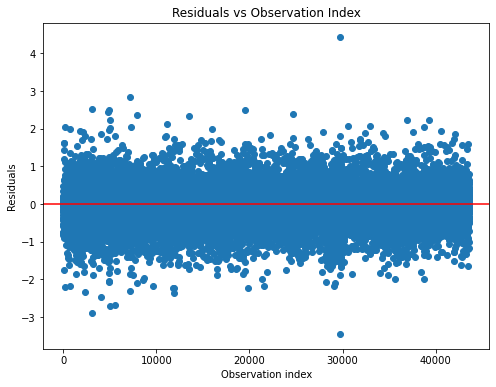

Durbin-Watson test statistic: 2.036257781201052


In [1746]:
#Check independence of residuals
predicted = model.predict(X)
residuals = y-predicted
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(range(len(residuals)), residuals)
ax.set_xlabel("Observation index")
ax.set_ylabel("Residuals")
ax.set_title("Residuals vs Observation Index")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()
dw_test = sm.stats.stattools.durbin_watson(residuals)
print("Durbin-Watson test statistic:", dw_test)

The test statistic is close to 2, indicateing that the residuals are independent

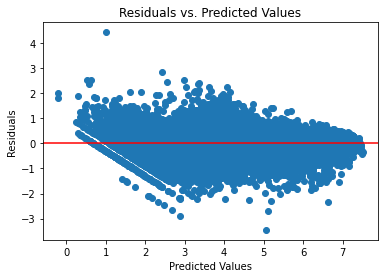

Pearson correlation coefficient:  -2.5944216555521746e-05
P-value:  0.9956786482346746


In [1747]:
# Check homoscedasticity
plt.scatter(predicted, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()
from scipy.stats import pearsonr
corr, p_value = pearsonr(predicted, residuals)
print("Pearson correlation coefficient: ", corr)
print("P-value: ", p_value)

Since Pearson correlation coeffcient is close to 0 and p value larger than 0.05, We conclude that no heteroscedasticity presented

Coefficient of determination (R-squared): 0.9672752718398582


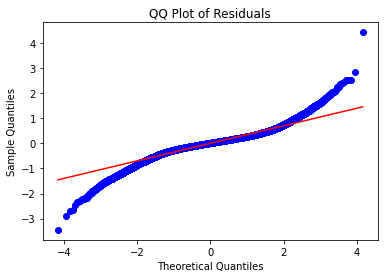

Shapiro-Wilk test for normality:
Test statistic: 0.935814380645752
p-value: 0.0


D:\Anaconda\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [1748]:
#Check Normality
fig, ax = plt.subplots(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=ax)
ax.set_title("QQ Plot of Residuals")
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Sample Quantiles")
slope, intercept, r2 = stats.probplot(residuals, dist="norm", plot=None)[1]
print("Coefficient of determination (R-squared):", r2)
plt.show()
stat, p = stats.shapiro(residuals)
print("Shapiro-Wilk test for normality:")
print("Test statistic:", stat)
print("p-value:", p)

R-squared of 0.96 indicates that residuals are approximately normal. Note that Shapiro-Wilk test tests whether the residuals are exactly normally distributed.

# Outlier Analysis

In [1608]:
# Extract coefficients and sort by absolute value
coeffs = pd.DataFrame({'predictor': bikes.drop("Demand", axis = 1).columns, 'coefficient': lr.coef_})
coeffs['abs_coefficient'] = coeffs['coefficient'].abs()
coeffs = coeffs.sort_values('abs_coefficient', ascending=False)

# Identify predictors with low partial relationship
low_partial_rels = coeffs[coeffs['abs_coefficient'] < 0.01]['predictor'].tolist()
temp = bikes.drop(low_partial_rels, axis = 1)


In [1531]:
# Calculate Cook's distance
influence = sm.OLS(lr.predict(X), sm.add_constant(X)).fit().get_influence()
cooks_distance = influence.cooks_distance[0]
# Identify influential points
influential_points = np.where(cooks_distance > 4/len(X))[0]
print("Influential outliers:", influential_points)
print("Number of influential points",len(influential_points))

Influential outliers: [    1     2     3 ... 43267 43397 43530]


2698

Removing influential points from the model won't increase the predictive power of the model, the model's predictive power even decreased a tiny bit. So we choose to include those influential points

In [1537]:
#temp = bikes[~bikes.index.isin(influential_points)]

# Regularization

In [1677]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.004605922041145104)
ridge.fit(X_train,y_train)
from sklearn.metrics import mean_squared_error
pred_train = ridge.predict(X_train)
pred_test = ridge.predict(X_test)
training_mse = mean_squared_error(y_train, pred_train)
test_mse = mean_squared_error(y_test, pred_test)
print('Training Error:',  training_mse)
print('Test Error:', test_mse)

Training Error: 0.12782353589481307
Test Error: 0.1280680108001638


In [1678]:
from sklearn.metrics import r2_score
print(r2_score(y_train,pred_train))

0.9433094542904206


In [1674]:
alpha_array = np.logspace(-3,0,200)
tuned_parameters = [{'alpha': alpha_array}]
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
model = GridSearchCV(estimator = Ridge(), param_grid = tuned_parameters, scoring = 'r2', cv = 5, return_train_score = True)
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': array([0.001     , 0.00103532, 0.00107189, 0.00110975, 0.00114895,
       0.00118953, 0.00123155, 0.00127505, 0.00132009, 0.00136672,
       0.00141499, 0.00146497, 0.00151672, 0.00157029, 0.00162576,
       0.00168318, 0.00174263, 0.00180419, 0.00186791, 0.00193389,
       0.0020022 , 0.00207292, 0.00214614, 0.00222195, 0.00230043,
       0.00238169, 0.0024...
       0.36543831, 0.37834626, 0.39171015, 0.40554607, 0.41987071,
       0.43470132, 0.45005577, 0.46595257, 0.48241087, 0.49945051,
       0.51709202, 0.53535667, 0.55426645, 0.57384416, 0.5941134 ,
       0.61509858, 0.63682499, 0.65931883, 0.68260718, 0.70671813,
       0.73168071, 0.75752503, 0.78428221, 0.8119845 , 0.84066529,
       0.87035914, 0.90110183, 0.9329304 , 0.96588322, 1.        ])}],
             return_train_score=True, scoring='r2')

In [1675]:
print(model.best_params_, model.best_score_)

{'alpha': 0.004605922041145104} 0.9428881065054536
